## 1) Discovering the diamonds data with Python.


**The Python code below imports the diamonds dataset and calculates descriptive statistics and pivot tables.**
*   **Click the double-right arrow to restart the kernel and run all cells.**
*   **Examine the code below.**


In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns

# Import data and describe
diamonds = pd.read_csv('diamonds_casestudy.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,width,length,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [2]:
diamonds.describe()

,carat,depth,table,price,width,length,height
count,53940.000000,53890.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.748892,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432492,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Display a sample of the data
# Change random_state for a different sample
diamonds.sample(5, random_state=6)

,carat,cut,color,clarity,depth,table,price,width,length,height
9359,1.00,Good,F,SI1,63.6,62.0,4586,6.30,6.24,3.99
9490,1.10,Very Good,E,SI2,60.1,62.0,4607,6.65,6.69,4.01
27,0.30,Very Good,J,VS2,62.2,57.0,357,4.28,4.30,2.67
7743,1.24,Premium,E,SI2,60.8,57.0,4278,6.98,6.94,4.23
48686,0.77,Fair,J,VS1,61.2,66.0,2005,5.92,5.83,3.60


In [5]:
# Calculate group means based on cut
diamonds.groupby(by=['cut']).mean(numeric_only=True)

,carat,depth,table,price,width,length,height
cut,,,,,,,
Fair,1.046137,64.036839,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365436,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709344,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264177,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.817683,57.956150,3981.759891,5.740696,5.770026,3.559801


In [7]:
# Calculate group sizes for cut
diamonds.groupby(by=['cut']).size()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

In [9]:
# Calculate group means by color
diamonds.groupby(by=['color']).mean(numeric_only=True)

,carat,depth,table,price,width,length,height
color,,,,,,,
D,0.657795,61.697207,57.404590,3169.954096,5.417051,5.421128,3.342827
E,0.657867,61.661545,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736538,61.694591,57.433536,3724.886397,5.614961,5.619456,3.464446
G,0.771190,61.756430,57.288629,3999.135671,5.677543,5.680192,3.505021
H,0.911799,61.836192,57.517811,4486.669196,5.983335,5.984815,3.695965
I,1.026927,61.845799,57.577278,5091.874954,6.222826,6.222730,3.845411
J,1.162137,61.887660,57.812393,5323.818020,6.519338,6.518105,4.033251


In [11]:
# Calculate group sizes by color
diamonds.groupby(by=['color']).size()

color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
dtype: int64

In [13]:
# Pivot table with average price for cut and color combinations
diamonds.pivot_table(values='price', index='color', columns='cut', aggfunc="mean")

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,4291.061350,3405.382175,2629.094566,3631.292576,3470.467284
E,3682.312500,3423.644159,2597.550090,3538.914420,3214.652083
F,3827.003205,3495.750275,3374.939362,4324.890176,3778.820240
G,4239.254777,4123.482204,3720.706388,4500.742134,3872.753806
H,5135.683168,4276.254986,3889.334831,5216.706780,4535.390351
I,4685.445714,5078.532567,4451.970377,5946.180672,5255.879568
J,4975.655462,4574.172638,4918.186384,6294.591584,5103.513274


In [15]:
# Pivot table with group sizes for cut and color combinations
diamonds.pivot_table(values='price', index='cut', columns='color', aggfunc=np.size)

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


## Try 5.6.2: Structuring the diamonds data with Python.

**The Python code below imports the diamonds dataset, standardizes or normalizes selected features, and plots the restructured features.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**


### DataWrangling_Diamonds_02

In [20]:
# Import packages and data
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [22]:
# Standardize prices
price = diamonds['price']
std_price = preprocessing.scale(price)
diamonds['std_price'] = std_price

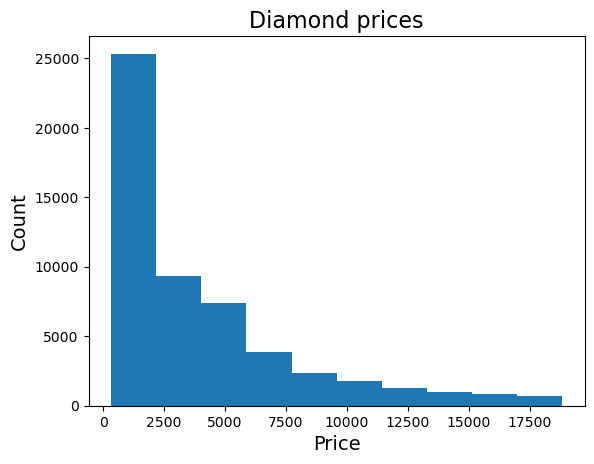

In [24]:
# Histogram of prices
plt.hist(price)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Diamond prices', fontsize=16)
plt.show()

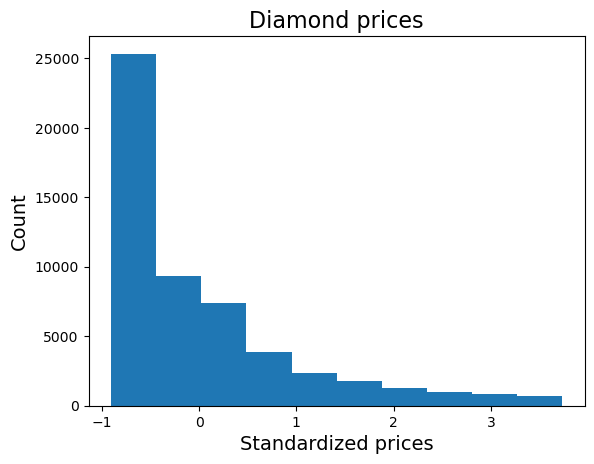

In [26]:
# Histogram of standardized prices
plt.hist(std_price)
plt.xlabel('Standardized prices', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Diamond prices', fontsize=16)
plt.show()

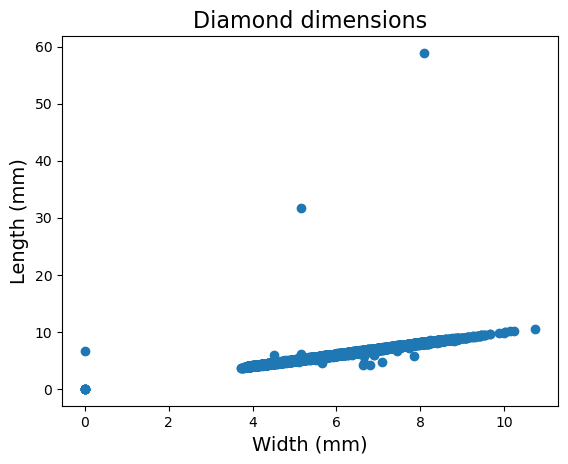

In [28]:
# Scatterplot of width and length
plt.scatter(x=diamonds['width'], y=diamonds['length'])
plt.xlabel('Width (mm)', fontsize=14)
plt.ylabel('Length (mm)', fontsize=14)
plt.title('Diamond dimensions', fontsize=16)
plt.show()

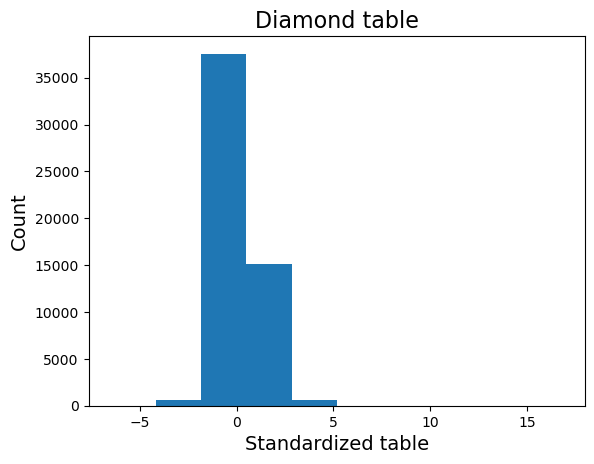

In [30]:
# Standardize table and produce a plot
table = diamonds['table']
std_table = preprocessing.scale(table)
plt.hist(std_table)
plt.xlabel('Standardized table', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Diamond table', fontsize=16)
plt.show()

Text(0, 0.5, 'Count')

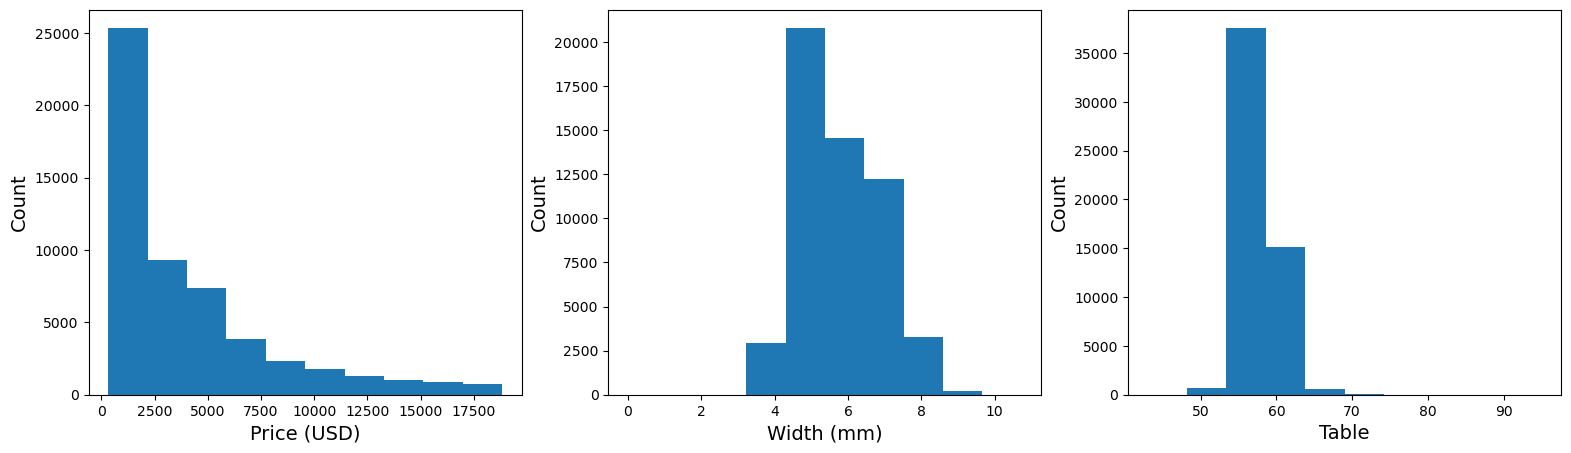

In [32]:
# Plot price, width, and table
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (19, 5)

plt.subplot(1, 3, 1)
plt.hist(diamonds['price'])
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(1, 3, 2)
plt.hist(diamonds['width'])
plt.xlabel('Width (mm)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(1, 3, 3)
plt.hist(diamonds['table'])
plt.xlabel('Table', fontsize=14)
plt.ylabel('Count', fontsize=14)

## Try 5.6.3: Cleaning the diamonds data with Python.

In [35]:
# Display the number of entries for each feature
diamonds.count()

carat        53940
cut          53940
color        53940
clarity      53940
depth        53890
table        53940
price        53940
width        53940
length       53940
height       53940
std_price    53940
dtype: int64

In [37]:
# Display the number of instances that have
# NA for each feature
diamonds.isnull().sum()

carat         0
cut           0
color         0
clarity       0
depth        50
table         0
price         0
width         0
length        0
height        0
std_price     0
dtype: int64

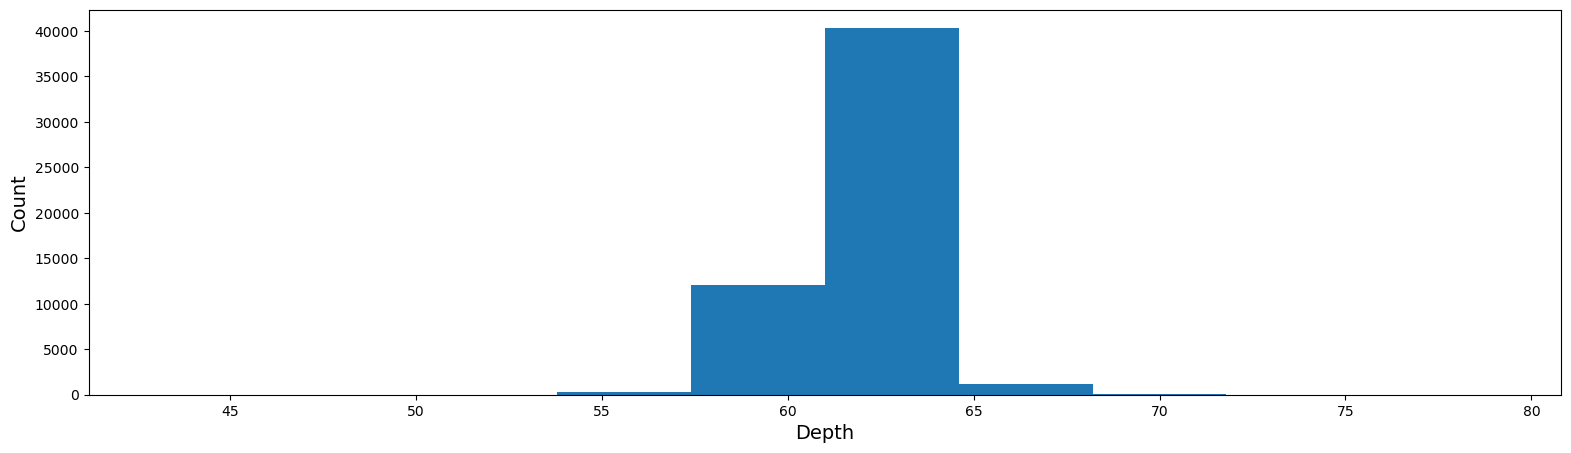

In [39]:
# Are there outliers in depth?
plt.hist(diamonds['depth'])
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [41]:
# Calculate the mean of the 'depth' column
mean = diamonds['depth'].mean()

# Convert 'depth' to numeric explicitly before filling missing values
diamonds['depth'] = pd.to_numeric(diamonds['depth'], errors='coerce')

# Fill missing values with the calculated mean
diamonds['depth'] = diamonds['depth'].fillna(mean)

# Check if there are still missing values
diamonds.isnull().sum()


carat        0
cut          0
color        0
clarity      0
depth        0
table        0
price        0
width        0
length       0
height       0
std_price    0
dtype: int64

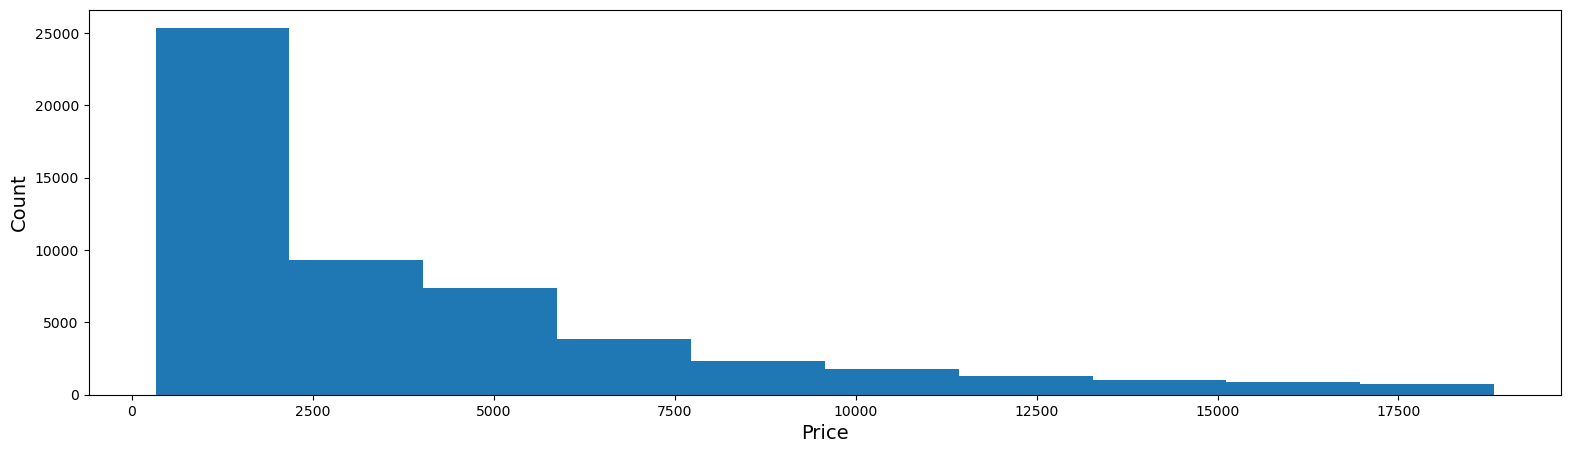

In [43]:
# Are there outliers in price?
plt.hist(diamonds['price'])
plt.xlabel('Price', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [45]:
# Display the diamonds with high prices
diamonds[diamonds['price'] >= 18000]

,carat,cut,color,clarity,depth,table,price,width,length,height,std_price
27408,2.16,Ideal,G,SI2,62.5,54.2,18001,8.23,8.27,5.16,3.526393
27409,2.09,Premium,F,SI2,61.7,59.0,18002,8.23,8.21,5.07,3.526643
27410,2.18,Premium,G,SI2,61.9,60.0,18003,8.29,8.24,5.12,3.526894
27411,2.06,Very Good,G,SI2,62.3,59.0,18005,8.07,8.20,5.07,3.527395
27412,2.25,Premium,D,SI2,60.4,59.0,18007,8.54,8.48,5.13,3.527897
...,...,...,...,...,...,...,...,...,...,...,...
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01,3.727425
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,3.727676
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56,3.728177
27748,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,3.731185


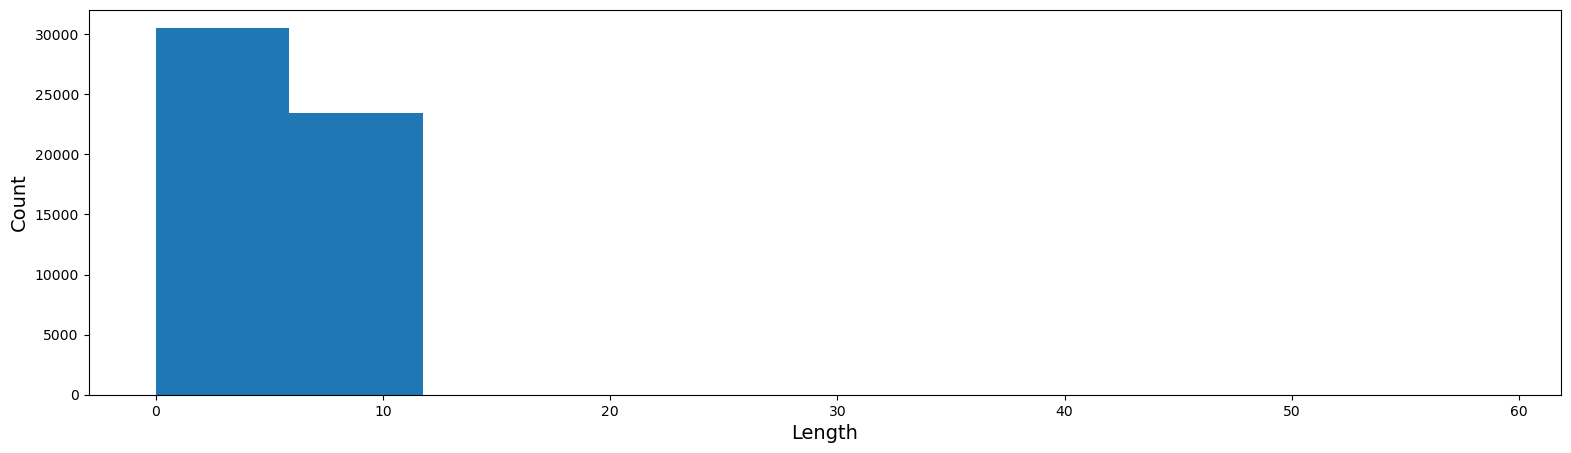

In [47]:
# Are there outliers in length?
plt.hist(diamonds['length'])
plt.xlabel('Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [49]:
# Display the diamonds with high lengths
diamonds[diamonds['length'] >= 10]

,carat,cut,color,clarity,depth,table,price,width,length,height,std_price
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,2.074797
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,2.830048
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,3.530654
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,3.659245
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,-0.465684


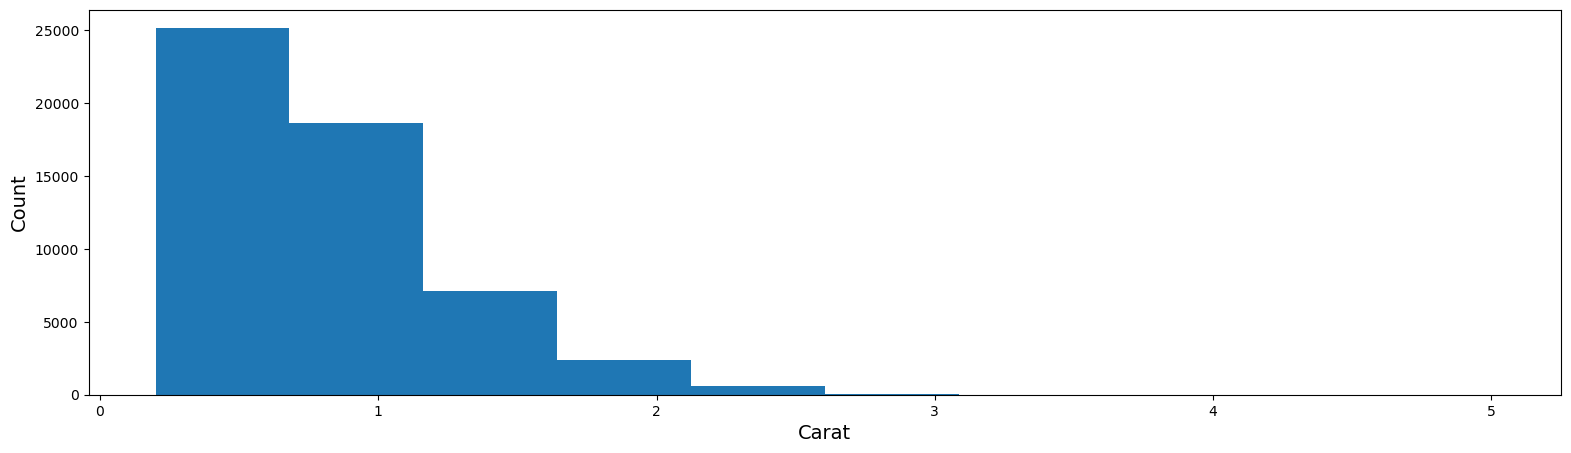

In [51]:
# Are there outliers in carat?
plt.hist(diamonds['carat'])
plt.xlabel('Carat', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [53]:
# Display the heaviest diamonds
diamonds[diamonds['carat'] >= 4]

,carat,cut,color,clarity,depth,table,price,width,length,height,std_price
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,2.830048
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,2.830048
26444,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31,3.020803
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,3.357946
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,3.530654
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,3.659245


Text(0, 0.5, 'Count')

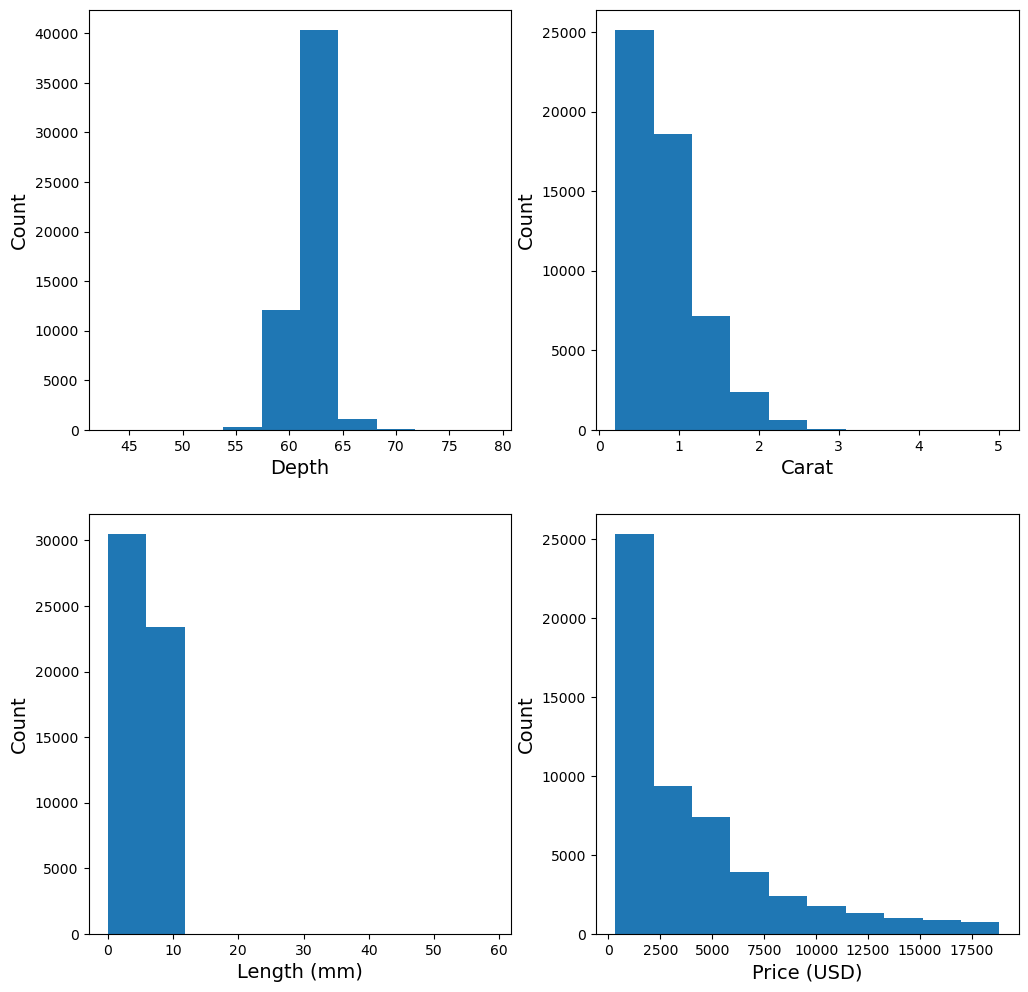

In [55]:
# Plot price, length, and carat
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (12, 12)

plt.subplot(2, 2, 1)
plt.hist(diamonds['depth'])
plt.xlabel('Depth', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(2, 2, 2)
plt.hist(diamonds['carat'])
plt.xlabel('Carat', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(2, 2, 3)
plt.hist(diamonds['length'])
plt.xlabel('Length (mm)', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.subplot(2, 2, 4)
plt.hist(diamonds['price'])
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Count', fontsize=14)

## Try 5.6.4: Enriching the diamonds data with Python.

**The Python code below imports the diamonds dataset and creates new features.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [ ]:
diamonds.groupby(by=['clarity']).size()

clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
dtype: int64

In [66]:
# Combine clarity into fewer levels
diamonds['clarity2'] = diamonds.clarity.map(
    {
        'IF': 'Internally flawless',
        'VVS1': 'Very very slightly included',
        'VVS2': 'Very very slightly included',
        'VS1': 'Very slightly included',
        'VS2': 'Very slightly included',
        'SI1': 'Slightly included',
        'SI2': 'Slightly included',
        'I1': 'Included',
    }
)
diamonds.groupby(by=['clarity2']).size()

clarity2
Included                         741
Internally flawless             1790
Slightly included              22259
Very slightly included         20429
Very very slightly included     8721
dtype: int64

In [68]:
# Diamond shape is not included in this dataset.
# But, the ratio of length to width can give some hints.
shape = diamonds['length'] / diamonds['width']
shape.describe()

count    5.393300e+04
mean              inf
std               NaN
min      6.189759e-01
25%      9.931034e-01
50%      1.004274e+00
75%      1.007429e+00
max               inf
dtype: float64

In [70]:
diamonds['length'].describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: length, dtype: float64

In [72]:
diamonds['width'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: width, dtype: float64

In [74]:
# Remove diamonds with length=0 and width=0, and recalculate

diamonds2 = diamonds[(diamonds['width'] > 0) & (diamonds['length'] > 0)]
shape = diamonds2['length'] / diamonds2['width']

diamonds2.insert(value=shape, loc=11, column='shape')
diamonds2['shape'].describe()

count    53932.000000
mean         1.000855
std          0.036366
min          0.618976
25%          0.993103
50%          1.004274
75%          1.007429
max          7.280593
Name: shape, dtype: float64

In [76]:
# Display the diamonds with a high shape value
diamonds2[diamonds2['shape'] > 1.1]

,carat,cut,color,clarity,depth,table,price,width,length,height,clarity2,shape
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,Slightly included,7.280593
34282,0.39,Premium,H,SI2,61.2,58.0,468,4.51,6.02,4.44,Slightly included,1.334812
48832,0.53,Ideal,F,VVS2,62.7,56.0,2030,5.16,6.20,3.25,Very very slightly included,1.201550
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,Very slightly included,6.174757
